# Closest Pair of Points Coding Challenge

In [0]:
import numpy as np

This exercise builds on the same ideas covered in the last one, so feel free to reuse any functions. Today we'll start by defining a function that takes
in a number of dimensions (call it n) and spits out a random vector n-dimensional vector. Each component of the vector should be randomly pulled from a
normal distribution with mean 0 and standard deviation 1.

In [0]:
# Function that generates a n-dimensional vector from a normal distribution
def rand_vec(n):
  mean = 0
  stdev = 1
  return (np.random.normal(mean,stdev,n))

Now generate a list of 50 vectors in 50-dimensional space. Call the list vec_list.

In [4]:
# vec_list = 50 vectors in 50 dimensional space
vec_list = []
for i in range(0,50):
  vec_list.append(rand_vec(50))
print (vec_list)  

[array([-6.18818901e-01,  1.40237010e-01,  1.06808925e+00,  1.99953729e+00,
       -1.02473215e-01, -6.66784750e-01, -4.03077664e-01,  5.78580082e-01,
       -1.07361977e+00, -9.40755593e-01, -1.98443165e-01,  8.82654287e-01,
        9.94476537e-02, -1.46925169e+00, -2.44492354e-01,  2.53664125e-01,
        8.40970752e-01,  1.24893191e+00,  1.86744472e+00, -1.65223784e-01,
       -1.10918606e+00,  2.64501290e-01,  1.38427210e+00, -9.06618308e-01,
       -7.63030351e-02,  4.54392437e-01, -8.71681334e-02,  4.02974455e-01,
       -1.01558319e+00,  3.88827334e-01, -3.79041708e-01,  9.79192604e-01,
        7.66243655e-02, -2.08766017e+00,  2.80370181e+00, -5.04811219e-01,
       -4.67224330e-01,  6.69076374e-01,  4.54477124e-01,  5.34644614e-01,
       -1.98362284e-01, -1.30278694e-01,  2.33587874e-03,  1.60798559e+00,
        6.04795662e-01, -2.72532055e+00,  6.45223200e-01,  1.43710564e+00,
        4.33173793e-01,  1.80295968e-01]), array([-1.56748839, -1.218011  , -0.77629974,  0.2049147

To every two vectors v1 and v2, recall how we calculate the distance bewteen v1 and v2. With that in mind, find the two
vectors closest to one another and print the distance between them. Hint: the answer isn't zero. 

[Closest pair of points problem](https://en.wikipedia.org/wiki/Closest_pair_of_points_problem)

In [0]:
# multivariate normal library in 2d:
points_2d = np.random.multivariate_normal([0,0],[[1,0],[0,1]],50)

In [0]:
def compute_closest_pair(set_of_points):
    minimum_distance = np.inf; #infinity as a "number"
    best_points = [-1,-1]
    for i in range(set_of_points.shape[0]):
        for j in range(i+1,set_of_points.shape[0]):
            dist = np.linalg.norm(set_of_points[i] - set_of_points[j])
            #print(i,j,dist)
            if(dist < minimum_distance):
                minimum_distance = dist
                best_points = np.array([set_of_points[i],set_of_points[j]])
    return minimum_distance, best_points 
      

In [23]:
distance, best_points = compute_closest_pair(points_2d)
print('shortest distance:',distance)
print('pair', best_points)
print(best_points[0],best_points[1])

shortest distance: 0.0037617165782201094
pair [[-0.46425835  0.05368998]
 [-0.4650023   0.05000256]]
[-0.46425835  0.05368998] [-0.4650023   0.05000256]


In [7]:
#sorting the list based on first element
vec_list.sort(key=lambda x: x[0])
print (vec_list)

[array([-1.93441297,  1.12497821,  0.52016155, -0.09118068, -2.28843536,
       -0.39459895, -0.2934365 , -0.63690194,  1.50127989,  0.17134317,
        1.25393811, -0.23027569,  0.5981913 , -1.38382026, -0.51227241,
       -0.61701997, -0.24636451, -0.03564561,  0.7073157 ,  0.01188356,
       -0.33681727,  0.49595996,  0.37084259, -1.63530586,  0.67301883,
        0.90378279,  0.84324217, -1.08172856, -0.72216267,  0.67537592,
       -0.29572109,  0.19609129, -0.50646103,  0.11192532,  0.39052169,
        1.42100069,  0.90670841, -0.69393708,  0.11223244,  1.50413897,
       -1.08049233, -0.38407842,  0.45052252, -0.56193263, -1.03605969,
       -1.5813884 ,  0.06465433,  0.08379602, -0.15217025, -0.55818025]), array([-1.77764775,  1.52767214, -0.78152146,  2.05756162, -0.91806379,
        1.50862595, -0.2979013 , -1.1052987 ,  1.32031178,  1.20526844,
       -0.53653566, -0.45076224,  0.52821987, -0.75078496, -0.7660595 ,
       -1.20737042, -0.99543409,  0.99289027,  0.3744373 ,  0

In [8]:
#implementing with dynamic approach(Recursive Approach)

# finding minimum distance among the first half
closest_pair1 = [0,0]
mindist1 = np.inf
v_len = len(vec_list)
split_index = v_len // 2

v_left = vec_list[:split_index]

for i in range(0,split_index):
  for j in range(i+1,split_index):
    a = vec_list[i]
    b = vec_list[j]
    dist = np.linalg.norm(a-b)
    if (dist < mindist1):
      mindist1 = dist
      closest_pair1 = [a,b]
print (mindist1) 
print (closest_pair1)
      

7.553263204570385
[array([-7.71123235e-01, -1.69142079e-01,  1.74547318e+00,  7.70907665e-01,
       -2.06259691e+00, -5.56180503e-01, -1.22940425e+00,  1.01043723e+00,
        1.44685368e+00,  3.20267641e-01, -6.35831862e-01, -8.78704963e-01,
       -9.87585479e-02,  2.34189445e-01, -1.95519840e-03, -6.64676186e-01,
        8.31863147e-01,  5.30460047e-01, -4.35526301e-01,  2.32398400e-01,
        4.82018646e-01, -7.33798888e-01,  2.96817152e-02,  9.81754675e-01,
        4.65475446e-02, -6.56747192e-01,  4.10111954e-02,  9.92497754e-01,
       -5.88344584e-01,  2.01680634e+00,  2.29488065e+00,  7.02104197e-01,
       -2.13540102e+00, -7.00765743e-01, -1.31432458e+00,  6.55512976e-02,
       -8.63829063e-01, -3.31216378e-01,  7.97255377e-01, -2.70736580e-01,
        6.43166164e-01, -2.04540794e+00,  9.49041548e-01, -2.76213715e-01,
       -6.96848563e-02,  4.23784617e-01, -3.28263998e-01,  1.57936057e+00,
       -3.94672965e-01, -3.53187954e-01]), array([-0.0605806 , -2.51670352,  1.30

In [9]:
# finding minimum distance among the first half
mindist2 = np.inf
closest_pair2 = [0,0]
v_right = vec_list[split_index:]
for i in range(split_index,v_len):
  for j in range(i+1,v_len):
    a = vec_list[i]
    b = vec_list[j]
    dist = np.linalg.norm(a-b)
    if (dist < mindist2):
      mindist2 = dist
      closest_pair2 = [a,b]
print (mindist1) 
print (closest_pair2)

7.553263204570385
[array([ 5.39609616e-01, -8.11384255e-01,  2.82150489e+00,  1.11729118e+00,
        3.71280544e-01,  2.84347754e-01, -2.39443845e-01, -5.99706669e-01,
       -8.19848308e-01,  1.00173562e-01, -1.06092525e+00, -1.71329044e+00,
       -6.84162419e-01,  7.30262902e-02, -9.18194174e-01, -1.69114785e+00,
       -2.42844971e-05,  1.08700150e-01, -6.37131530e-02,  1.88178726e+00,
        4.05982130e-01, -1.00622332e+00,  1.31525450e+00,  3.62275278e-01,
        5.61628374e-01, -8.51359921e-01, -7.62097573e-01,  7.33306739e-01,
        9.03627817e-01, -6.93489390e-01,  9.40353963e-01,  7.35614647e-01,
       -6.74096608e-01, -5.59214157e-01, -4.30437804e-01, -1.37516379e+00,
        3.13637216e-01,  1.18483552e+00, -7.14286283e-01, -4.75851208e-02,
        1.13215715e+00,  1.01500546e+00,  1.00051135e+00, -2.07647654e+00,
       -1.33929666e-01, -4.17260489e-01,  9.56391303e-01, -3.90320510e-01,
       -9.43959859e-01, -1.77267476e+00]), array([ 1.40102328e+00, -7.34278744e-0

In [30]:
min = 0
if (mindist1 > mindist2):
  min = mindist2
else:
  min = mindist1
print (min)  

6.8086994026972505


Now find the two vectors furthest from one another.

In [10]:
# Inversion of Closest Pair of Points algorithm using Brute-force
maxdist = 0
furthest_pair = [0,0]
dist = 0.0
n = len(vec_list)
for i in range(0,n):
  for j in range(i+1,n):
    a = vec_list[i]
    b = vec_list[j]
    dist = np.linalg.norm(a-b)
    if (maxdist < dist):
      maxdist = dist
      furthest_pair[0] = a
      furthest_pair[1] = b
     
print (maxdist)      
print (furthest_pair)

12.64228395358634
[array([ 1.07245325, -0.37920678,  2.53160751,  1.08506009,  1.62460387,
        1.75469414, -1.58785823, -0.24390736, -0.24190871, -1.43641854,
        2.22314278,  1.19864052, -0.27987823,  0.00276822,  1.72315849,
       -1.7857822 ,  1.40604308,  0.10324834, -1.05903297,  0.3646253 ,
        0.11361143, -0.42191576, -0.79206136,  1.59655454, -1.11113104,
        1.09262302, -0.96082141,  0.28184395, -0.49691283, -1.67159411,
        0.30975008, -1.03955408, -1.24619016, -1.40338496, -2.43381473,
        0.20927485, -1.09915498,  1.12720226,  0.4186444 ,  0.95802725,
        0.96180602,  0.66560573, -0.72796432,  0.15699708, -0.66249704,
        1.21370322,  0.30507853,  0.82066113,  1.13359766,  2.03991258]), array([ 1.11689016,  0.83925206,  1.0361396 , -0.0415985 , -1.54235711,
        0.88512413,  0.40337318, -0.48436793, -1.00080812,  0.66386626,
       -0.84043476, -1.23120816, -1.05241746,  0.70105626, -1.97435535,
       -0.88212698, -1.47309534, -0.3109175

The 3d case: Literally the most fun visualization a human can perceive.

In [0]:
points_3d = np.random.multivariate_normal(np.zeros(3),np.identity(3),10)

distance 0.49240877636667596
best_points [[ 0.48233551  0.6181129  -0.31028827]
 [ 0.30450051  0.83264576 -0.71626459]]


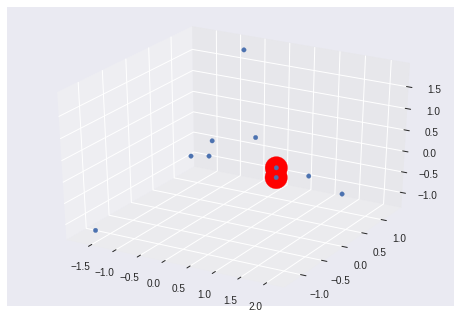

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X1, Y1, Z1 = points_3d.T

scatter1 = ax.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)

bx, by, bz = best_points.T
print('distance', distance)
print('best_points', best_points)

scatter2 = ax.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)